<a href="https://colab.research.google.com/github/5hyeona/mining/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94_2113899_%EC%98%A4%ED%98%84%EC%95%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
sns.set_style("whitegrid")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
mpg = pd.read_csv("/content/drive/MyDrive/health_data.csv")
display(mpg.head()) 
print(mpg.info()) 

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

#산점도

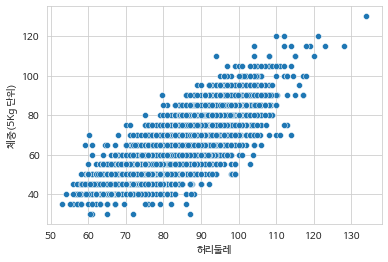

In [10]:
sns.scatterplot(data = mpg, x = '허리둘레', y = '체중(5Kg 단위)')

#산점도 그래프 인사이트
x를 허리둘레로 두고 y를 체중으로 두었을 때 점들이 분포되는 모양의 양의 그래프를 그린다. 데이터 내의 사람들의 체중이 높을 수록 허리 둘레가 커짐을 보여준다. 산점도 그래프를 통해 체중이 높을 수록 사람들의 허리둘레가 커졌다.

In [11]:
df_mpg = mpg.groupby('흡연상태' , as_index = False).agg( meanteeth = ('치석', 'mean'))
df_mpg

,흡연상태,meanteeth
0,No,0.535773
1,NotNow,0.579017
2,Yes,0.700150


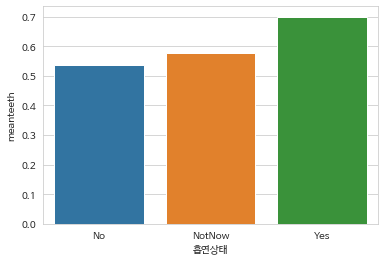

In [12]:
sns.barplot(data = df_mpg, x = '흡연상태', y = 'meanteeth')

#막대그래프 시각화 인사이트
치석과 흡연상태의 인과관계를 막대그래프로 도출하였다. 흡연을 하지 않는 사람들의 평균적인 치석의 수는 0.535773개, 흡연을 했었지만 지금은 하지 않는 사람들의 평균적인 치석의 수는 0.579017개, 현재 흡연을 하고 있는 사람들의 평균적인 치석의 수는 0.700150개로 흡연을 하고 있을 수록 치석이 많을 확률이 높다.

#데이터전처리

In [13]:
import pandas as pd
import seaborn as sns           
import matplotlib as mpl    
import matplotlib.pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv("/content/drive/MyDrive/health_data.csv")
df.rename(columns = {'HDL':'LDL'},inplace=True)
display(df.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [16]:
display(df.shape)
display(df.info())
display(df.isna().sum()) 
display(df.head(10))

(10000, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

None

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,1.1,25.0,32.0,26.0,Yes,Yes,0,NaN,NaN,12/29/2021
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,...,1.2,18.0,17.0,19.0,Yes,No,1,0.0,2.0,12/29/2021
8,2020,9,41,F,17,150,50,82.0,0.4,0.5,...,0.7,42.0,48.0,39.0,No,No,0,NaN,NaN,12/29/2021
9,2020,10,48,F,14,150,45,71.2,0.8,0.7,...,0.6,22.0,11.0,10.0,No,No,0,NaN,NaN,12/29/2021


In [14]:
print(df.isnull().sum())

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64


In [17]:
df_drop_row = df.dropna(axis=0)
print("결측행 모두 제거: ", df_drop_row.shape)

결측행 모두 제거:  (1249, 31)


In [18]:
from sklearn.preprocessing import LabelEncoder

items=['성별코드','체중(5Kg 단위)','총콜레스테롤','HDL콜레스테롤','LDL콜레스테롤','혈색소','흡연상태','음주여부']

encoder = LabelEncoder()
labels = encoder.fit_transform(items)

print(items)
print('인코딩 클래스:',encoder.classes_)
print('인코딩 변환값:',labels)

['성별코드', '체중(5Kg 단위)', '총콜레스테롤', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '흡연상태', '음주여부']
인코딩 클래스: ['HDL콜레스테롤' 'LDL콜레스테롤' '성별코드' '음주여부' '체중(5Kg 단위)' '총콜레스테롤' '혈색소' '흡연상태']
인코딩 변환값: [2 4 5 0 1 6 7 3]


In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
labels = labels.reshape(-1,1)

oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)
print(items)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

['성별코드', '체중(5Kg 단위)', '총콜레스테롤', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '흡연상태', '음주여부']
원-핫 인코딩 데이터
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 8)


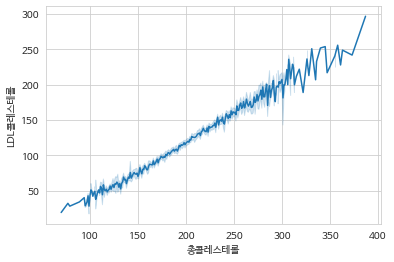

In [21]:
sns.lineplot(data = df, x = '총콜레스테롤', y = 'LDL콜레스테롤')

#라인그래프 시각화 인사이트
라인 그래프를 통해서 LDL콜레스테롤 수치가 높을수록 총콜레스테롤의 수치가 높아짐을 알 수 있었다. LDL콜레스테롤 수치가 높을수록 동맥경화나 각종 질병을 야기할 확률이 높은데, 총콜레스테롤은 낮을수록 몸에 좋으므로 둘이 상관관계가 있다고 볼 수 있다.
